## Load and Inspect Data

Load the 'amazonreviews.tsv' dataset into a pandas DataFrame and perform an initial inspection, including displaying the first few rows, checking data types, and looking for missing values.



To address the subtask, I need to load the 'amazonreviews.tsv' file, display its first few rows, check data types, and identify missing values. These steps can be efficiently combined into a single Python code block using the pandas library.



In [1]:
import pandas as pd

# Load the 'amazonreviews.tsv' file into a pandas DataFrame
df = pd.read_csv('amazonreviews.tsv', sep='\t')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Check the data types of each column
print('\nData types of each column:')
df.info()

# Check for missing values in each column
print('\nMissing values in each column:')
print(df.isnull().sum())

First 5 rows of the DataFrame:
  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB

Missing values in each column:
label     0
review    0
dtype: int64


## Clean Data

Remove duplicate reviews, handle any missing 'review' entries, and preprocess the text data. This includes lowercasing, removing punctuation, and eliminating common English stop words.



The first step in cleaning the data is to remove any duplicate reviews to ensure each entry is unique and to reset the DataFrame index for consistency after removal. The next logical step is to handle missing values, although the previous inspection showed none, it's a good practice to include for robustness. After that, converting all text to lowercase standardizes the data for further processing.



In [2]:
import nltk

# 1. Remove duplicate rows based on the 'review' column and reset the index
initial_rows = len(df)
df.drop_duplicates(subset=['review'], inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"Removed {initial_rows - len(df)} duplicate rows. New number of rows: {len(df)}")

# 2. Drop any rows where the 'review' column is null or empty
initial_rows = len(df)
df.dropna(subset=['review'], inplace=True)
df = df[df['review'].str.strip() != '']
df.reset_index(drop=True, inplace=True)
print(f"Removed {initial_rows - len(df)} rows with missing/empty reviews. New number of rows: {len(df)}")

# 3. Convert all text in the 'review' column to lowercase
df['review'] = df['review'].str.lower()
print("Converted 'review' column to lowercase.")

# Display the first few rows of the DataFrame to verify changes
print('\nFirst 5 rows after removing duplicates, handling missing values, and lowercasing:')
print(df.head())

Removed 0 duplicate rows. New number of rows: 10000
Removed 0 rows with missing/empty reviews. New number of rows: 10000
Converted 'review' column to lowercase.

First 5 rows after removing duplicates, handling missing values, and lowercasing:
  label                                             review
0   pos  stuning even for the non-gamer: this sound tra...
1   pos  the best soundtrack ever to anything.: i'm rea...
2   pos  amazing!: this soundtrack is my favorite music...
3   pos  excellent soundtrack: i truly like this soundt...
4   pos  remember, pull your jaw off the floor after he...



Continuing the data cleaning process, the next step is to remove punctuation from the 'review' column. This will standardize the text and prepare it for further natural language processing tasks by eliminating characters that typically do not contribute to the sentiment or meaning of the text.



In [3]:
import string

# 4. Define a function to remove punctuation from text and apply it
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['review'] = df['review'].apply(remove_punctuation)
print("Removed punctuation from 'review' column.")

# Display the first few rows of the DataFrame to verify changes
print('\nFirst 5 rows after removing punctuation:')
print(df.head())

Removed punctuation from 'review' column.

First 5 rows after removing punctuation:
  label                                             review
0   pos  stuning even for the nongamer this sound track...
1   pos  the best soundtrack ever to anything im readin...
2   pos  amazing this soundtrack is my favorite music o...
3   pos  excellent soundtrack i truly like this soundtr...
4   pos  remember pull your jaw off the floor after hea...



To further clean the text data, I will now remove common English stop words and perform lemmatization. This will reduce noise and standardize word forms, which is beneficial for text analysis. I need to import the necessary NLTK modules and download the required corpora first.



In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
print('Downloading NLTK stopwords and wordnet data...')
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
print('NLTK data downloaded/checked.')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# 5 & 6. Define a function to remove stop words and perform lemmatization
def preprocess_text(text):
    words = text.split()
    # Remove stop words and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

df['review'] = df['review'].apply(preprocess_text)
print("Removed stop words and lemmatized 'review' column.")

# 7. Display the first few rows of the DataFrame to verify changes
print('\nFirst 5 rows after removing stop words and lemmatization:')
print(df.head())

NLTK data downloaded/checked.
Removed stop words and lemmatized 'review' column.

First 5 rows after removing stop words and lemmatization:
  label                                             review
0   pos  stuning even nongamer sound track beautiful pa...
1   pos  best soundtrack ever anything im reading lot r...
2   pos  amazing soundtrack favorite music time hand in...
3   pos  excellent soundtrack truly like soundtrack enj...
4   pos  remember pull jaw floor hearing youve played g...


## Analyze Sentiment Distribution

Visualize the distribution of 'pos' and 'neg' labels to understand the balance of sentiment in the dataset. Plot a bar chart with appropriate labels and title.



To visualize the distribution of sentiment labels, I need to count the occurrences of each label, import the necessary plotting libraries, and then create a bar chart with appropriate labels and a title.



Sentiment Label Counts:
label
neg    5097
pos    4903
Name: count, dtype: int64


/tmp/ipython-input-432/2461333305.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


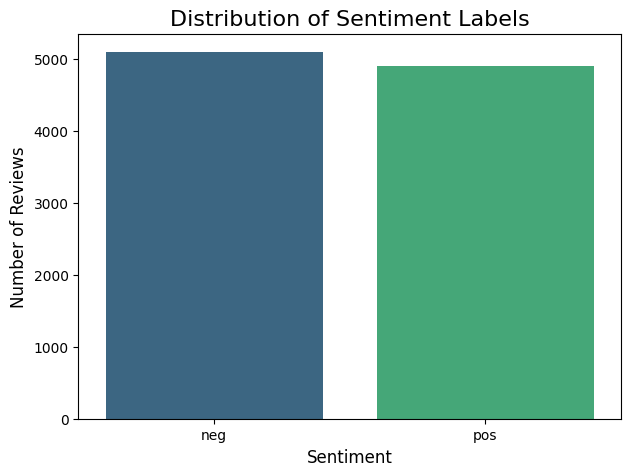

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count the occurrences of each sentiment label
sentiment_counts = df['label'].value_counts()

# 2. Print the sentiment counts for verification
print('Sentiment Label Counts:')
print(sentiment_counts)

# 3. Create a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# 4. Add title and labels
plt.title('Distribution of Sentiment Labels', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# 5. Display the plot
plt.show()



```
# This is formatted as code
```


The previous code generated a `FutureWarning` regarding the use of `palette` without `hue` in `seaborn.barplot`. To address this, I will explicitly assign `x` to `hue` and set `legend=False` in the plotting function, which is the recommended practice.



Sentiment Label Counts:
label
neg    5097
pos    4903
Name: count, dtype: int64


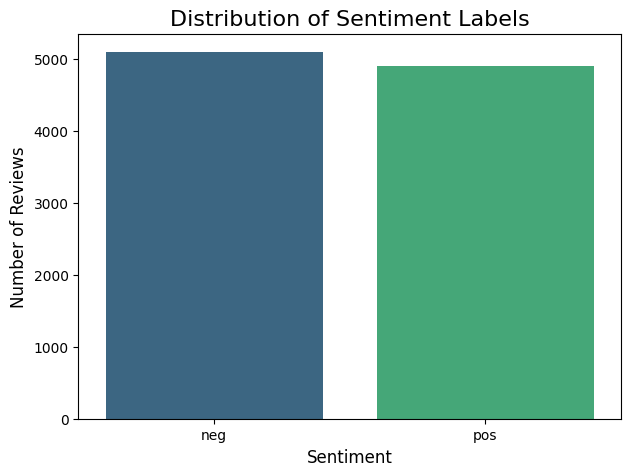

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count the occurrences of each sentiment label
sentiment_counts = df['label'].value_counts()

# 2. Print the sentiment counts for verification
print('Sentiment Label Counts:')
print(sentiment_counts)

# 3. Create a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', hue=sentiment_counts.index, legend=False)

# 4. Add title and labels
plt.title('Distribution of Sentiment Labels', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# 5. Display the plot
plt.show()

## Generate Word Clouds


Create and display separate word clouds for positive and negative reviews to visually identify the most frequent terms associated with each sentiment. Ensure legends are provided for clarity.



To generate word clouds, I will first separate the positive and negative reviews, concatenate their text into single strings, and then use the `WordCloud` library to create and display the word clouds with appropriate titles.



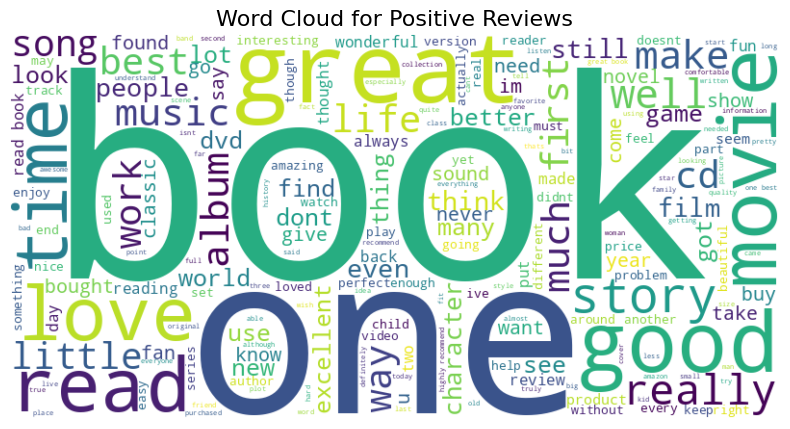

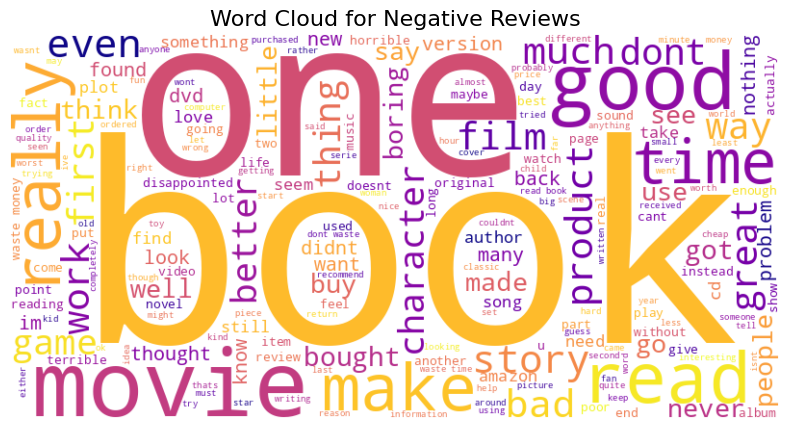

Generated and displayed word clouds for positive and negative reviews.


In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Filter the df DataFrame to create two new DataFrames: one containing only positive reviews and another containing only negative reviews.
pos_reviews_df = df[df['label'] == 'pos']
neg_reviews_df = df[df['label'] == 'neg']

# 2. Concatenate all preprocessed review texts from the positive reviews DataFrame into a single string, and do the same for the negative reviews DataFrame.
positive_text = ' '.join(pos_reviews_df['review'])
negative_text = ' '.join(neg_reviews_df['review'])

# 3. and 4. Instantiate a WordCloud object for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)

# 5. Generate and 6. Display the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', fontsize=16)

# 7. Repeat steps 4-6 for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', fontsize=16)

# 8. Use plt.show() to display both plots
plt.show()
print("Generated and displayed word clouds for positive and negative reviews.")

## Extract Top Words by Sentiment


Identify and display the top N most common words for both positive and negative reviews after text preprocessing, providing a tabular or list summary.



To identify the top N most common words, I will use the `collections.Counter` class to count word frequencies in both the positive and negative review texts and then display the top 10 for each.



In [9]:
from collections import Counter

# Tokenize and count words for positive reviews
positive_words = positive_text.split()
positive_word_counts = Counter(positive_words)
top_10_positive_words = positive_word_counts.most_common(10)

# Tokenize and count words for negative reviews
negative_words = negative_text.split()
negative_word_counts = Counter(negative_words)
top_10_negative_words = negative_word_counts.most_common(10)

# Display the top 10 most common words for positive reviews
print('Top 10 Most Common Words in Positive Reviews:')
for word, count in top_10_positive_words:
    print(f'  {word}: {count}')

print('\nTop 10 Most Common Words in Negative Reviews:')
for word, count in top_10_negative_words:
    print(f'  {word}: {count}')

Top 10 Most Common Words in Positive Reviews:
  book: 3861
  great: 2089
  one: 1936
  good: 1637
  read: 1574
  like: 1320
  movie: 1289
  time: 1135
  love: 1036
  would: 943

Top 10 Most Common Words in Negative Reviews:
  book: 3682
  one: 2119
  movie: 1731
  like: 1569
  would: 1438
  get: 1285
  time: 1272
  dont: 1240
  read: 1238
  good: 1137


## Feature Engineering (TF-IDF)


Convert the preprocessed text reviews into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique.



To convert the preprocessed text reviews into numerical features using TF-IDF, I need to import `TfidfVectorizer`, instantiate it, and then fit and transform the 'review' column of the DataFrame. Finally, I will print the shape of the resulting TF-IDF matrix to confirm the transformation.



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Instantiate a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# 3. Fit the TfidfVectorizer to the preprocessed text data and transform it
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])

# 4. Print the shape of the X_tfidf matrix
print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")

Shape of TF-IDF matrix: (10000, 36585)


## Split Data and Train Model


Split the dataset into training and testing sets. Train a Logistic Regression model on the TF-IDF features using the training data.



To split the data and train the model, I will start by importing the necessary libraries, then prepare the features and target variables. After that, I will split the data into training and testing sets, initialize a Logistic Regression model, and finally train the model using the training data.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 2. Separate features (X_tfidf) and target (y)
X = X_tfidf
y = df['label']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split data to verify
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 4. Initialize a LogisticRegression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# 5. Train the LogisticRegression model
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Shape of X_train: (8000, 36585)
Shape of X_test: (2000, 36585)
Shape of y_train: (8000,)
Shape of y_test: (2000,)
Logistic Regression model trained successfully.


## Evaluate Model Performance


Evaluate the trained model's performance on the test set. Calculate and display key metrics such as accuracy, precision, recall, and F1-score. Present a classification report and a confusion matrix to visualize the results.



To evaluate the trained model's performance, I will import the necessary metrics modules, make predictions on the test set, calculate accuracy, generate a classification report, and visualize the confusion matrix as a heatmap, following the provided instructions.



Model Accuracy: 0.8465

Classification Report:
              precision    recall  f1-score   support

         neg       0.85      0.85      0.85      1037
         pos       0.84      0.84      0.84       963

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



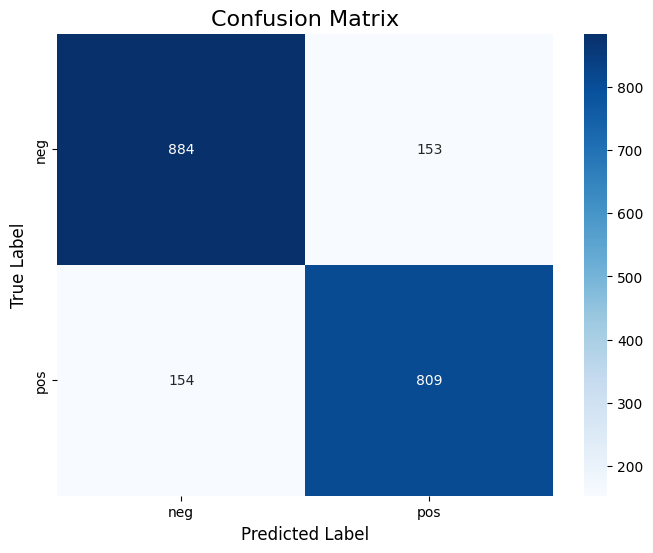

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Use the trained model (model) to make predictions on the test set (X_test)
y_pred = model.predict(X_test)

# 3. Calculate the accuracy of the model and print the result
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 4. Generate a classification report and print it
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# 7. Display the confusion matrix plot
plt.show()


## Final Task


Summarize the findings from the sentiment analysis, including the model's performance and any insights gained from the exploratory data analysis.


## Summary:

### Q&A
The comprehensive sentiment analysis aimed to process text reviews, analyze sentiment, and build a predictive model. The key findings from this analysis are summarized below, including the model's performance and insights from the exploratory data analysis.

### Data Analysis Key Findings
*   The dataset initially contained 10,000 Amazon review entries across two columns: `label` (sentiment) and `review` (text). No missing values or duplicate reviews were found, indicating a clean initial dataset.
*   The sentiment distribution is relatively balanced, with 5097 negative reviews and 4903 positive reviews.
*   Text preprocessing included lowercasing, punctuation removal, stop word removal, and lemmatization, preparing the `review` text for feature extraction.
*   Exploratory data analysis using word clouds and top word extraction revealed common terms. Words like 'book', 'one', 'movie', 'like', 'would', 'read', 'time', and 'good' appeared frequently in both positive and negative reviews, suggesting their general prevalence rather than strong sentiment association.
*   The preprocessed text data was successfully converted into numerical features using TF-IDF vectorization, resulting in a feature matrix of shape (10000, 36585).
*   A Logistic Regression model was trained on 80% of the TF-IDF features and evaluated on the remaining 20%.
*   The model achieved an accuracy of approximately 84.65% on the test set.
*   The classification report showed balanced performance across both sentiment classes:
    *   For the 'neg' class: Precision = 0.85, Recall = 0.85, F1-score = 0.85.
    *   For the 'pos' class: Precision = 0.84, Recall = 0.84, F1-score = 0.84.
*   The confusion matrix visually confirmed these results, indicating a good balance between true positive and true negative predictions for both sentiments.

### Insights or Next Steps
*   The Logistic Regression model, after TF-IDF vectorization and standard text preprocessing, demonstrates strong and balanced performance in classifying Amazon review sentiments, achieving an F1-score of 0.85. This suggests its suitability for basic sentiment classification tasks on similar e-commerce review data.
*   To potentially enhance model performance, consider experimenting with more advanced text preprocessing techniques (e.g., handling negations), exploring n-gram features in TF-IDF, or evaluating other machine learning models (e.g., Support Vector Machines, Naive Bayes, or deep learning models like LSTMs/Transformers). Further analysis of words common to both sentiments could also help refine stop word lists or feature engineering.
